<a href="https://colab.research.google.com/github/wbandabarragan/Bootcamp2025/blob/main/CursoB_Semana2/Scientific_Data/scientific_dataformats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific data formats:

In this tutorial, we will learn to open datasets that are stored in different scientific data formats:

- Binary format
- NetCDF
- HDF5
- VTK
- FITS

Please download the files from here:
https://www.dropbox.com/scl/fo/aip4lo4983phsyd5tcn77/ALvNSCjfQpzlbjrKmhP5Ex8?rlkey=m4ragdal7lagwczhtkvyqj0ty&dl=0


# 1. Binary data format

Binary data refers to raw data.

- It can be written in single precission (4 bytes = 32 bits) or double (8 bytes = 64 bits) precission.

- This means no headers, no metadata, and no information on the structure of the files are included in the data.

- Then, we need to know what sort of structure the data are stored in beforehand, otherwise we can only guess.

- Sometimes guessing is possible because we can calculate the shape of the arrays based on the size of the file.

- In this case I generated the file beta_temp.dbl, so I know it has a 2D array of 160 x 160 grid cells in double precission.


In [ ]:
# Expected size in DBL precission
160*160*8

204800

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Open the file
beta_temp = open("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/Data_Session3/simulation_data/beta_temp.dbl", "rb")
print(type(beta_temp))

<class '_io.BufferedReader'>


In [ ]:
# Pass the data to an array
data_beta_temp = np.fromfile(beta_temp, dtype = np.float64)
print(type(data_beta_temp))

print(data_beta_temp.shape)

<class 'numpy.ndarray'>
(25600,)


In [ ]:
160*160

25600

In [ ]:
# Reshape into a 2D array
data_2D = data_beta_temp.reshape((160,160))

In [ ]:
print(np.min(data_2D), np.max(data_2D))

print(np.min(data_2D[np.nonzero(data_2D)]), np.max(data_2D))

0.0 0.017762970387921417
6.119781382620724e-13 0.017762970387921417


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_75766/309201197.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data_2D), cmap = "Greens")


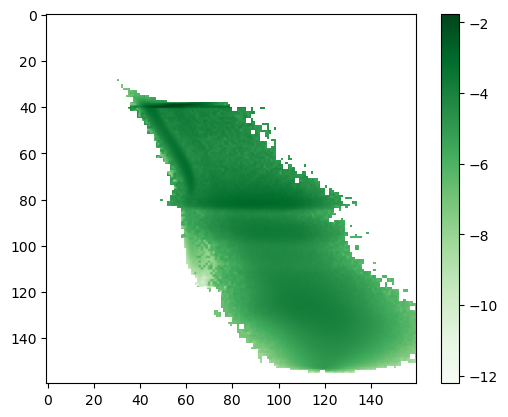

In [ ]:
# Plotting

plt.figure()

plt.imshow(np.log10(data_2D), cmap = "Greens")

plt.colorbar()
plt.show()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_75766/931781942.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data_2D), cmap = "Greens")


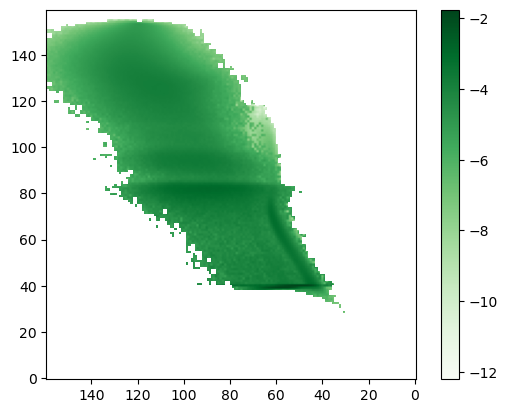

In [ ]:
# Plotting

plt.figure()

plt.imshow(np.log10(data_2D), cmap = "Greens")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.colorbar()
plt.show()

# 2. NetCDF

This is the favourite format of Earth scientists, particularly climate/weather researchers.

- This is a self-describing data format. This means it does not need a descriptor file to be read, but all the necessary metadata to understand the file structure and content is embedded in the format.


- It contains three sections:


    - DIMENSIONS, which indicates how the data are organised in the file.

    - VARIABLES, which contains information on both the data values and metadata, including some attributes such as units, each variable can have different shapes (e.g. 3D or 2D).

    - GENERAL INFORMATION, which displays the main file properties, such as version of the library, date, and copyright information.


conda install netCDF4

#### Data downloaded from this repository:
https://www.unidata.ucar.edu/software/netcdf/examples/files.html

In [ ]:
!python --version

Python 3.9.18


In [ ]:
import netCDF4 as ncdf

In [ ]:
# Open the file

data_tos = ncdf.Dataset("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/Data_Session3/simulation_data/tos_O1_2001-2002.nc")

print(type(data_tos))

<class 'netCDF4._netCDF4.Dataset'>


Let us see the metadata of this file:

In [ ]:
print(data_tos)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

In [ ]:
print(data_tos.__dict__['source'])
print(data_tos.__dict__['contact'])

IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr


In [ ]:
for dim in data_tos.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2


In [ ]:
for var in data_tos.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
    original_units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (180, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
    original_units: degrees_north
unlimited dimensions: 
current shape = (170,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (170, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 ti

In [ ]:
print(data_tos["tos"])

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on


In [ ]:
# Collect the data

tos = data_tos["tos"][:]

print(type(tos))
print(tos.shape)

<class 'numpy.ma.core.MaskedArray'>
(24, 170, 180)


In [ ]:
# Slice the 3D array
sea_temp = tos[0,:,:]

print(sea_temp.shape)

(170, 180)


In [ ]:
np.unique(sea_temp)

masked_array(data=[271.1732482910156, 271.17364501953125,
                   271.1769104003906, ..., 304.3877258300781,
                   304.6780090332031, --],
             mask=[False, False, False, ..., False, False,  True],
       fill_value=1e+20,
            dtype=float32)

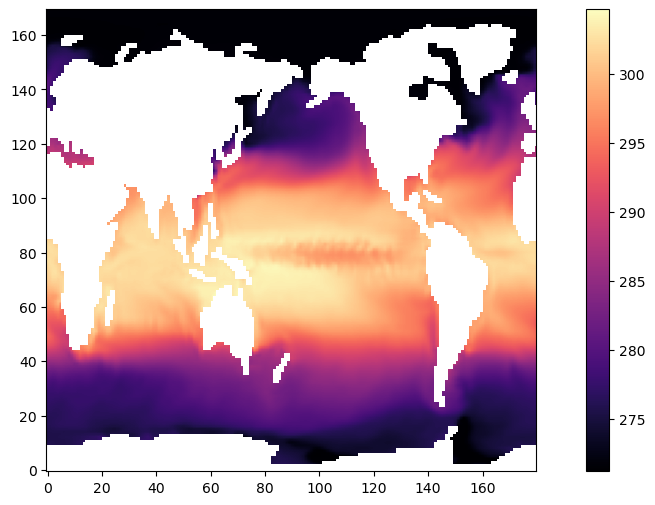

In [ ]:
# Plotting

plt.figure(figsize=(13,6))

plt.imshow(sea_temp, cmap = "magma")
plt.gca().invert_yaxis()
plt.colorbar()

plt.show()

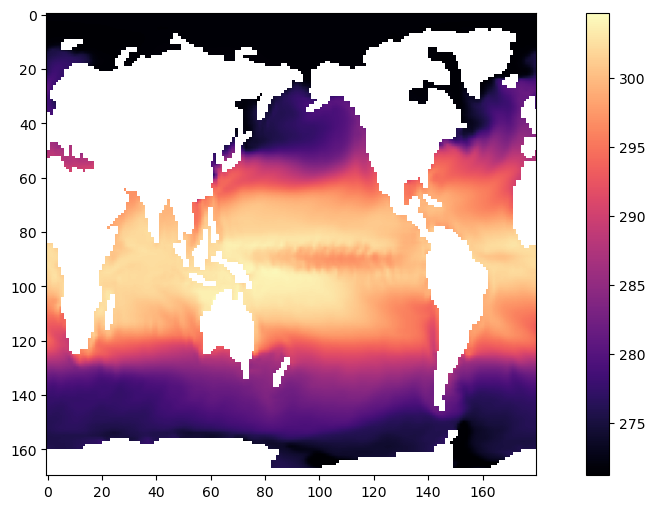

In [ ]:
# Plotting

plt.figure(figsize=(13,6))

plt.imshow(np.flipud(sea_temp), cmap = "magma")
plt.colorbar()

plt.show()

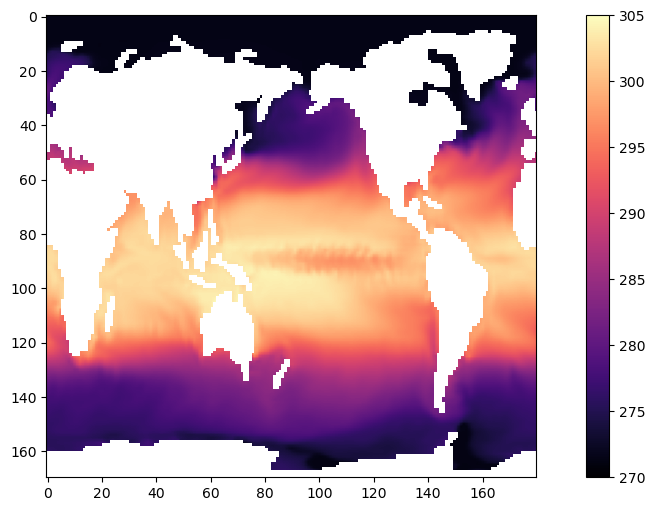

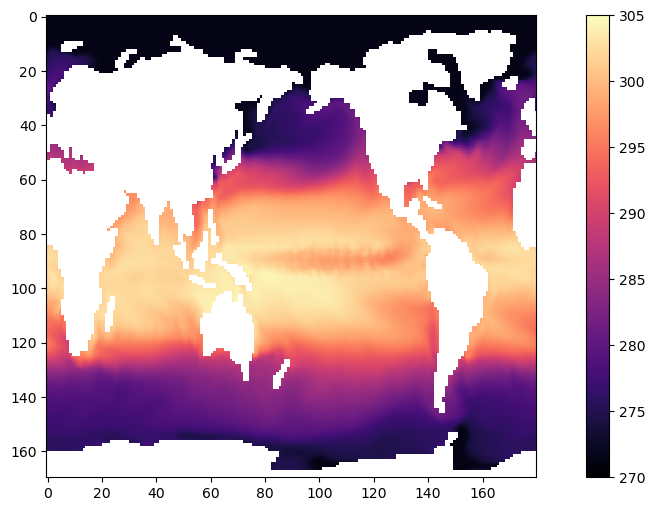

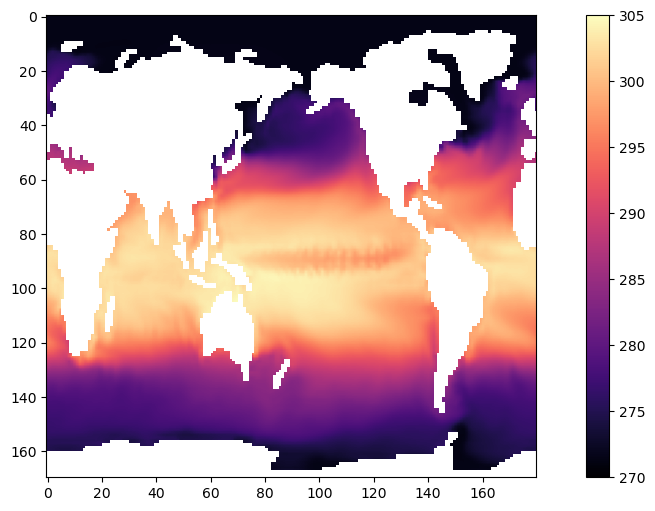

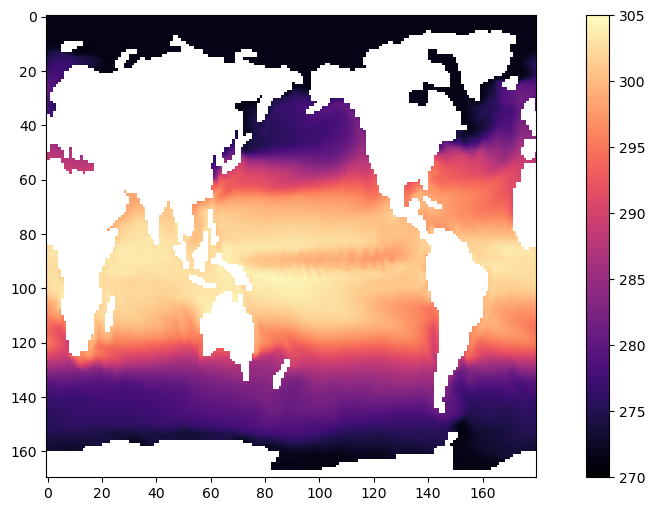

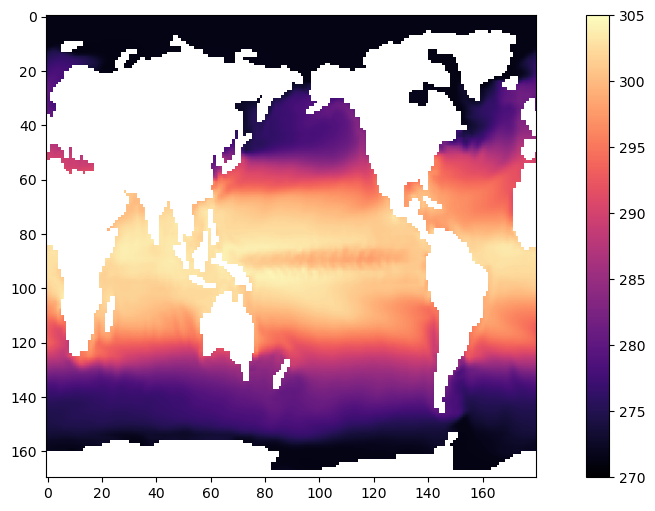

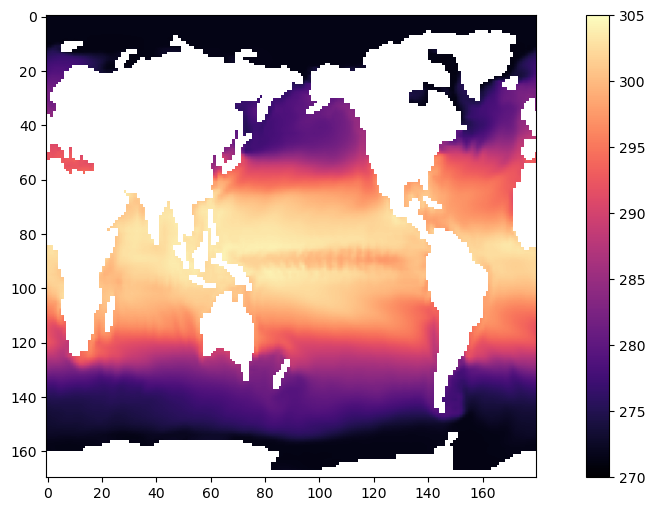

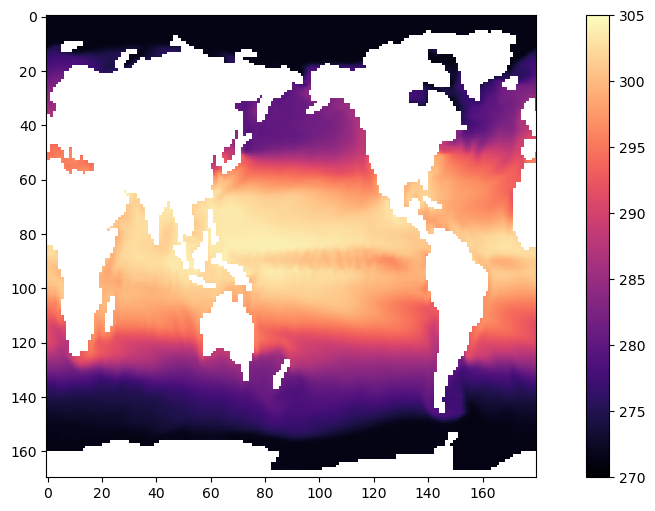

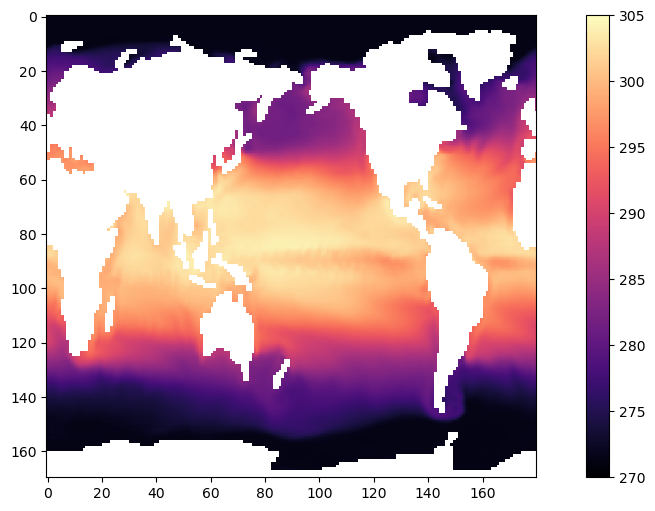

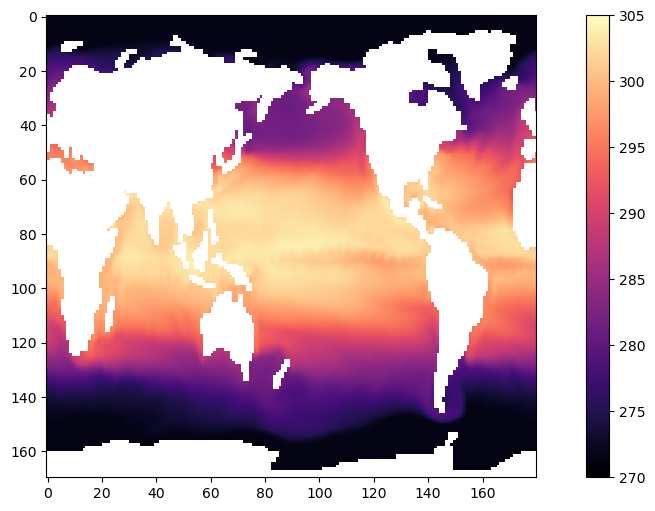

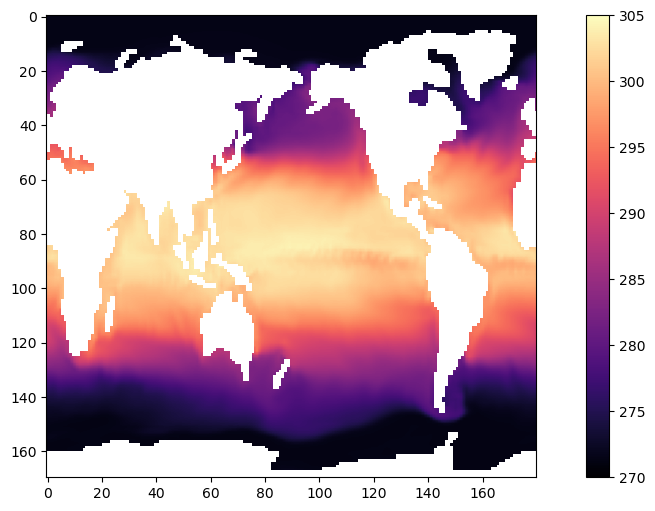

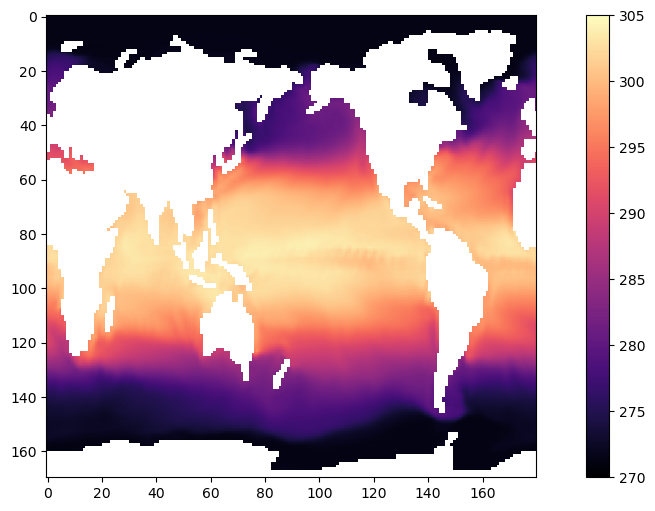

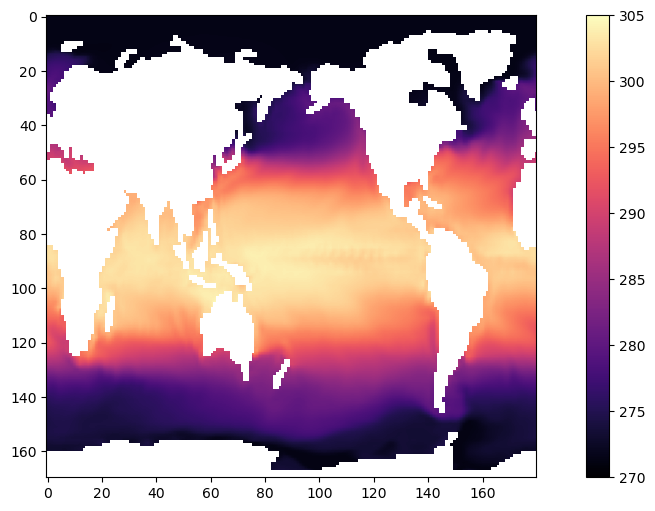

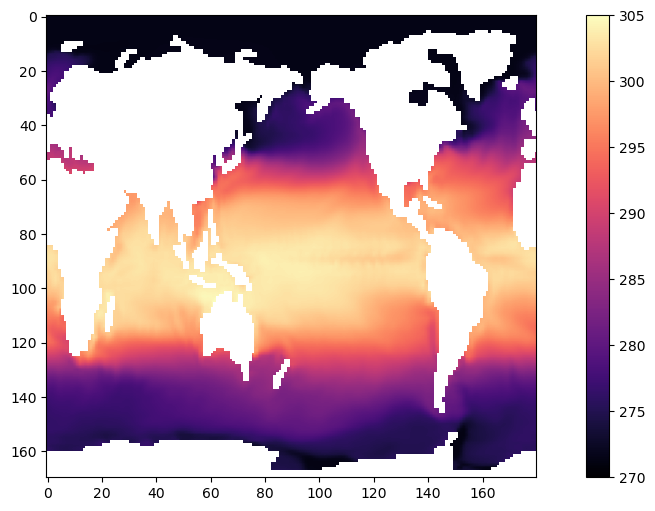

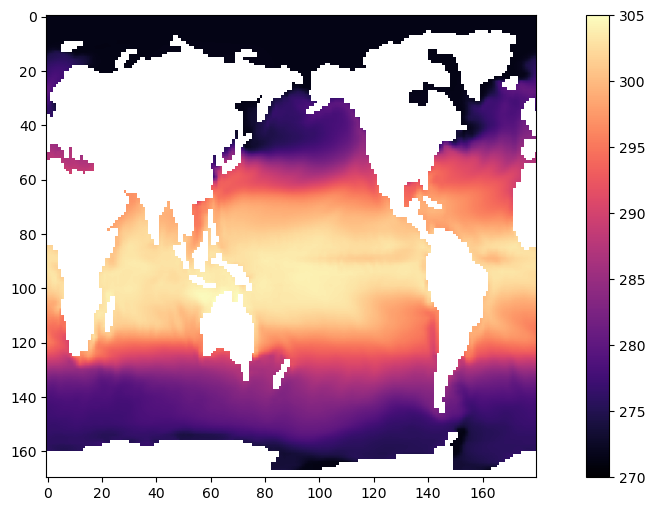

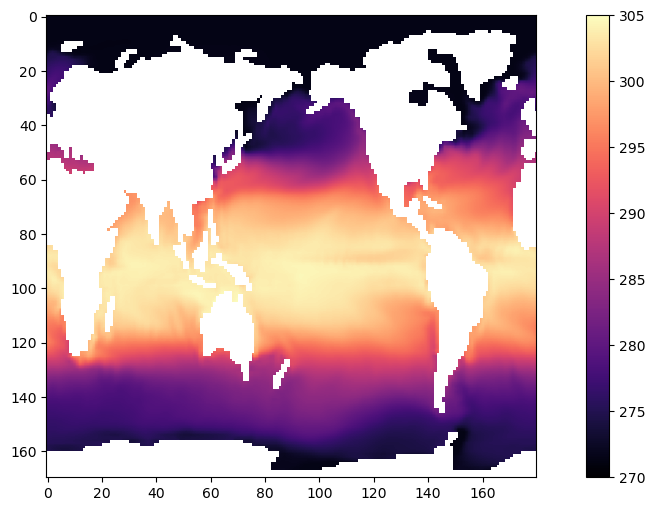

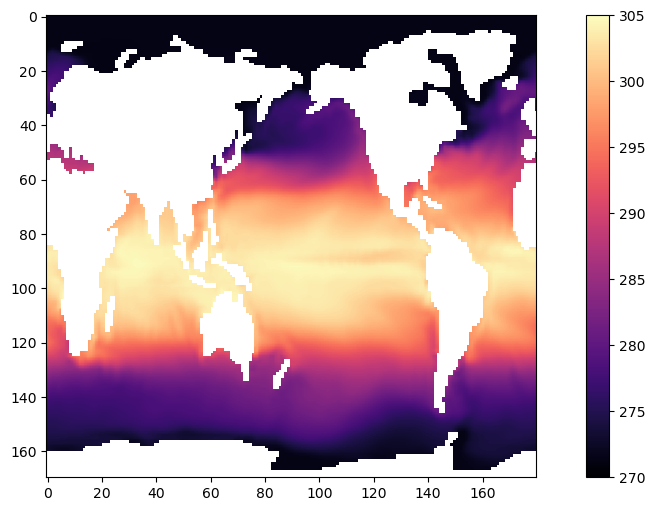

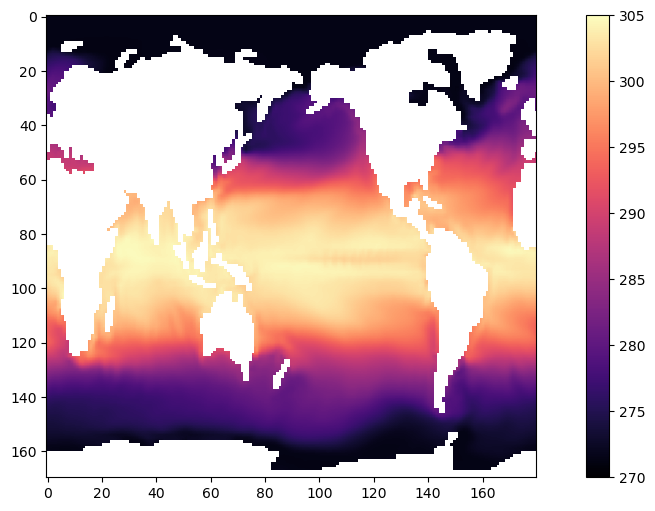

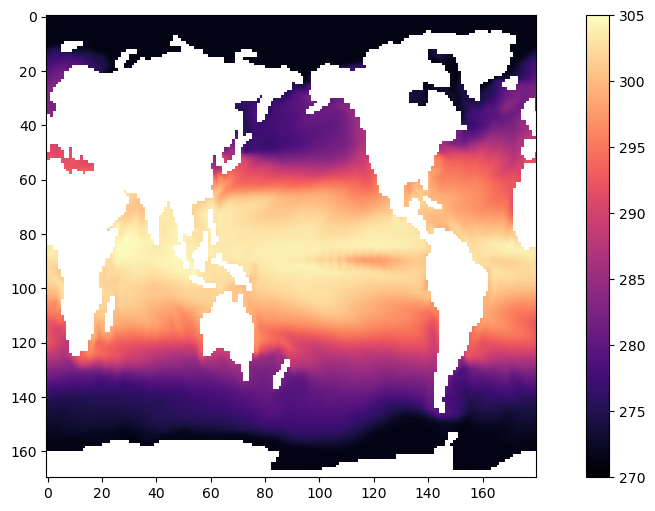

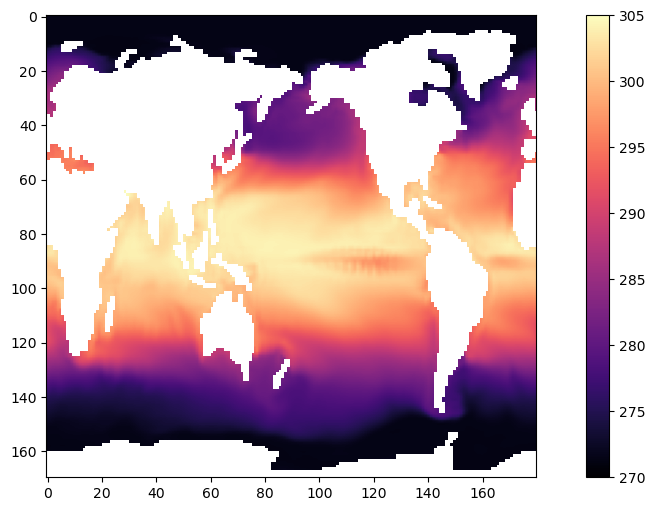

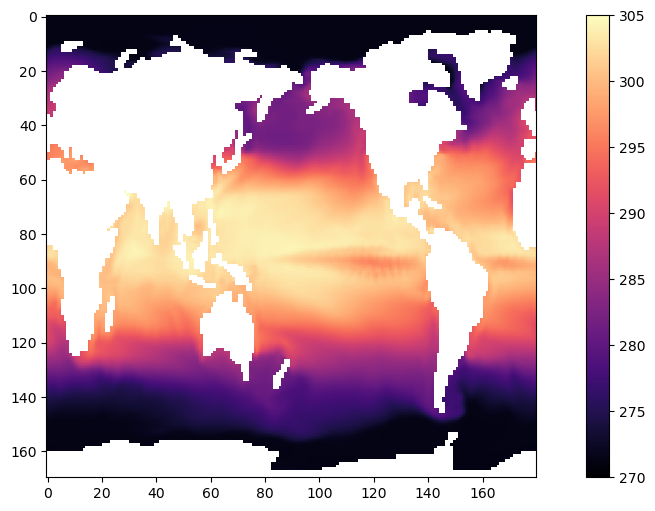

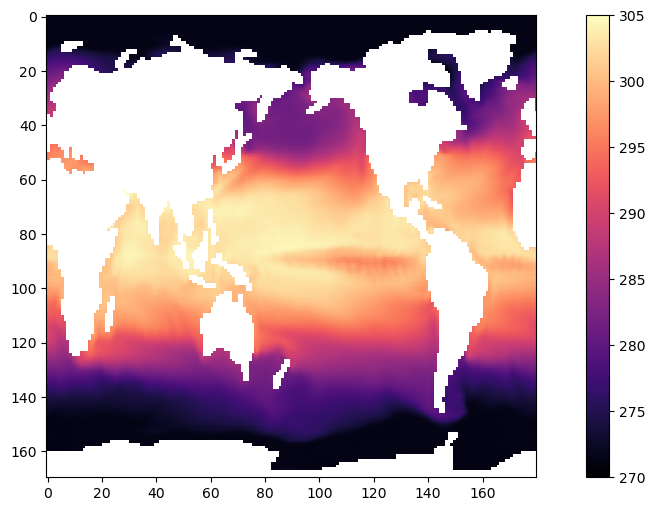

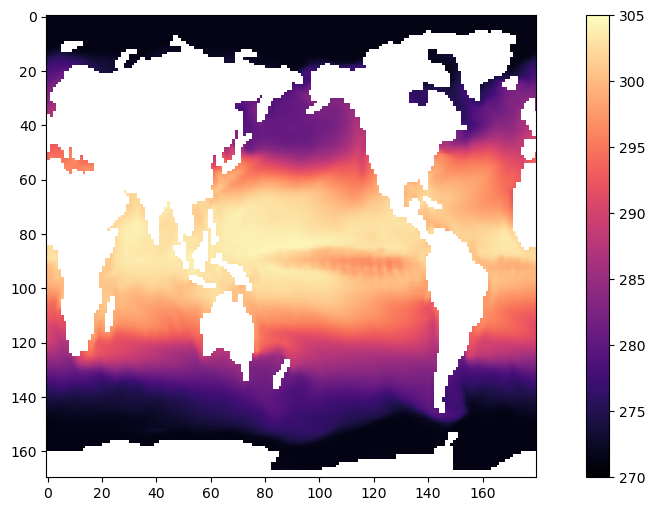

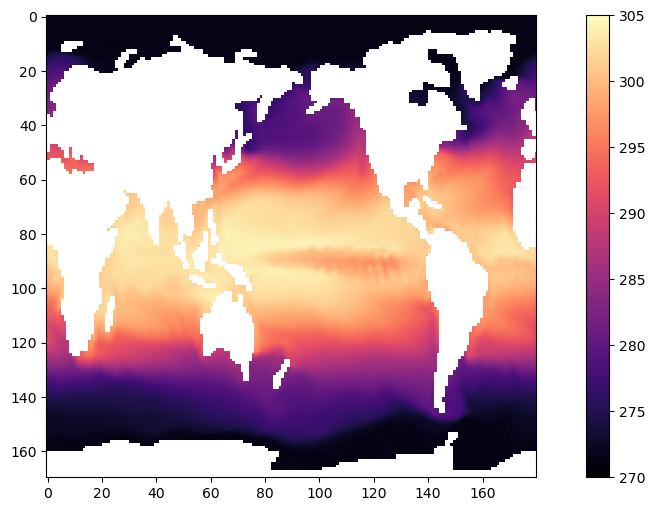

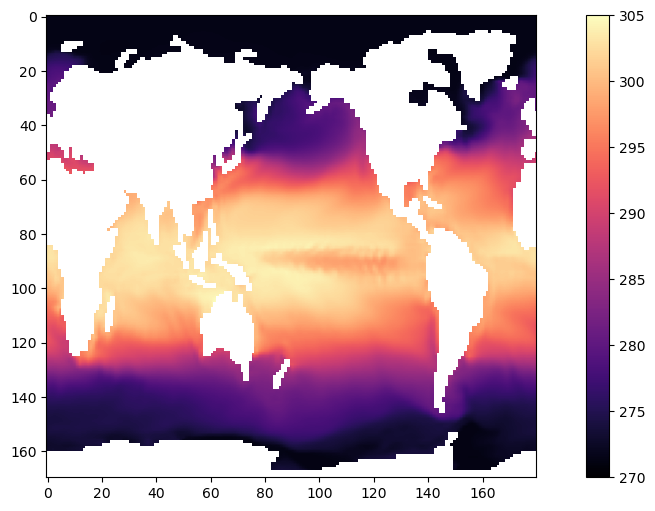

In [ ]:
# For time loop

for i in range(24):
    #print(i)
    sea_temp = tos[i,:,:]

    plt.figure(figsize=(13,6))
    plt.imshow(np.flipud(sea_temp), cmap = "magma", clim=(270, 305))
    plt.colorbar()
    plt.show()

# 3. Hierarchical Data Format v5 (HDF5)

This is also a self-descriptive format, which is widely used in many physics sub-fields because of its versatility.

- Data stored here can be very large!


- Data don't have to be of the same type, you can save numbers, units, strings, images, etc, all in the same file.


- It uses the structure of a file directory, organising information in GROUPS.


- GROUPS are then comprised of data fields with their own metadata.


### Packages:
pip install nexusformat

conda install h5py

# File taken from the Trident ion_table database.

See: http://trident-project.org/data/ion_table/

In [ ]:
import nexusformat.nexus as nx
import h5py

In [ ]:
# Open the h5 file with nexus

coolants = nx.nxload("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/Data_Session3/simulation_data/hm2012_lr.h5")

print(type(coolants))

print(coolants.tree)


<class 'nexusformat.nexus.tree.NXroot'>
root:NXroot
  Al = >f4(14x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  Ar = >f4(19x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  B = >f4(6x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  Be = >f4(5x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12...
    @Temperature = [1.   1.05 1.1  ... 8.9  8.95 9.  ]
  C = >f4(7x27x25x161)
    @Parameter1 = [-9.  -8.5 -8.  ...  3.   3.5  4. ]
    @Parameter2 = [ 0.       0.12202  0.25893 ... 11.589   13.12..

In [ ]:
# Open the file with h5py

filename = "/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/Data_Session3/simulation_data/hm2012_lr.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
    #print(data)

Keys: <KeysViewHDF5 ['Al', 'Ar', 'B', 'Be', 'C', 'Ca', 'Cl', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'H', 'He', 'K', 'Li', 'Mg', 'Mn', 'N', 'Na', 'Ne', 'Ni', 'O', 'P', 'S', 'Sc', 'Si', 'Ti', 'V', 'Zn']>


In [ ]:
# Second way

f_2 = h5py.File(filename, "r")

#list(f_2.items())

#list(f_2.values())

list(f_2.__iter__())

['Al',
 'Ar',
 'B',
 'Be',
 'C',
 'Ca',
 'Cl',
 'Co',
 'Cr',
 'Cu',
 'F',
 'Fe',
 'H',
 'He',
 'K',
 'Li',
 'Mg',
 'Mn',
 'N',
 'Na',
 'Ne',
 'Ni',
 'O',
 'P',
 'S',
 'Sc',
 'Si',
 'Ti',
 'V',
 'Zn']

In [ ]:
# Get the data
dset_Ar = f_2["Ar"]
dset_C = f_2["C"]

print(dset_Ar.shape, dset_C.shape)
print(dset_Ar[0,:,0,:].shape)

print(f_2.attrs("Ar"))

(19, 27, 25, 161) (7, 27, 25, 161)
(27, 161)


TypeError: 'AttributeManager' object is not callable

In [ ]:
dset_Ar[0][:][10][:].shape

(25, 161)

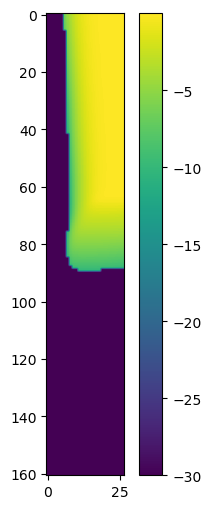

In [ ]:
# Plotting

plt.figure(figsize=(4,6))

plt.imshow(dset_Ar[0,:,0,:].T)

plt.colorbar()

plt.show()



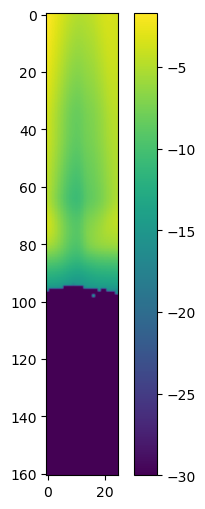

In [ ]:
# Plotting

plt.figure(figsize=(4,6))

plt.imshow(dset_C[0][10].T)

plt.colorbar()

plt.show()

## 4. Visualization ToolKit (VTK) format

https://vtk.org/

This format is an open-source data format, developed by Kitware, and widely used in computational fluid dynamics and computer graphics applications. There are two sub-formats, legacy and XML.

### VTK file structure:

1. File version and ID.

2. Header, comments with informaton on the dataset.

3. Data type, which can be Binary or ASCII.

4. Domain structure, mesh/grid information:

- DATASET
    - STRUCTURED_GRID
    - UNSTRUCTURED_GRID
    - RECTILINEAR_GRID
    - POLYDATA
    - FIELD
    
- Coordinates, Dimensions, Grid spacing.

5. Attributes

- Values stored at grid cells, e.g. scalars, vectors, tensors.

### Package:

conda install pyvista

pip install pyvista

Imagen tomada de: http://victorsndvg.github.io/FEconv/formats/vtk.xhtml

#![](https://drive.google.com/uc?id=1SZR76Q19ixrM5olFiYhw-w17oaAccqQ3)

In [ ]:
import pyvista as pv

In [ ]:
# Open the file

input_directory = "/Users/wbandabarragan/Dropbox/Shared_folder/Data_Session3/simulation_data/"
file_name = "shock-cloud.vtk"

# We collect the data into a mesh
mesh_sc = pv.read(input_directory+file_name)

In [ ]:
# Check the pv object
print(type(mesh_sc))

print(mesh_sc)

print(mesh_sc.array_names)

<class 'pyvista.core.grid.RectilinearGrid'>
RectilinearGrid (0x31bf669a0)
  N Cells:      1000000
  N Points:     1030301
  X Bounds:     -5.000e+00, 1.500e+01
  Y Bounds:     -1.000e+01, 1.000e+01
  Z Bounds:     -1.000e+01, 1.000e+01
  Dimensions:   101, 101, 101
  N Arrays:     6
['rho', 'vx1', 'vx2', 'vx3', 'prs', 'tr1']


As we can see the data consists of a 3D grid of 100x100x100 cells, i.e. 1.e6 grid cells in total.

The data are organised in 6 arrays:

    Number Of Arrays: 6
    Array 0 name = rho
    Array 1 name = vx1
    Array 2 name = vx2
    Array 3 name = vx3
    Array 4 name = prs
    Array 5 name = tr1
    
  Bounds:
    Xmin,Xmax: (-5, 15)
    Ymin,Ymax: (-10, 10)
    Zmin,Zmax: (-10, 10)
  Compute Time: 0
  Dimensions: (101, 101, 101)
  X Coordinates: 0x7fbefd475a70
  Y Coordinates: 0x7fbefd476cf0
  Z Coordinates: 0x7fbefd476fc0
  Extent: 0, 100, 0, 100, 0, 100    
    
Which we can now read with:

In [ ]:
# Read the arrays:

# Density of the gas in code units
rho = pv.get_array(mesh_sc, "rho", preference = "cell")

# Thermal pressure of the gas in code units
prs = pv.get_array(mesh_sc, "prs", preference = "cell")

# We can see the arrays has been flattened
print(rho.shape)
print(prs.shape)

(1000000,)
(1000000,)


Therefore, we need to re-shape the array into 3D.

We can use the information on the dimensions from teh original VTK file.

In [ ]:
# get the mesh dimensions
print(mesh_sc.dimensions[2] - 1)

100


In [ ]:
# Reconstruct the 3D array of rho
rho_3D = rho.reshape(mesh_sc.dimensions[0] - 1, \
                     mesh_sc.dimensions[1] - 1,
                     mesh_sc.dimensions[2] - 1,)
prs_3D = rho.reshape(mesh_sc.dimensions[0] - 1, \
                     mesh_sc.dimensions[1] - 1,
                     mesh_sc.dimensions[2] - 1,)

print(rho_3D.shape, prs_3D.shape)


(100, 100, 100) (100, 100, 100)


### Slicing:

In [ ]:
print((mesh_sc.dimensions[0]-1)//2)

50


In [ ]:
# Obtain a 2D slice from the 3D data cube

rho_2D = rho_3D[(mesh_sc.dimensions[0]-1)//2 ,:, :]
prs_2D = prs_3D[(mesh_sc.dimensions[0]-1)//2 ,:, :]

print(rho_2D.shape)
print(prs_2D.shape)

(100, 100)
(100, 100)


In [ ]:
print(np.min(rho_2D), np.max(rho_2D))

1.0 7.5381804


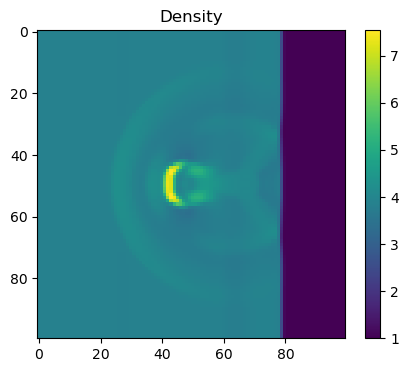

In [ ]:
# Plotting

plt.figure(figsize=(5,4))

plt.imshow(rho_2D, cmap = "viridis")

plt.colorbar()
plt.title("Density")
plt.show()

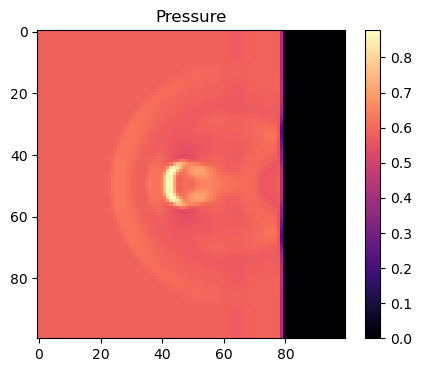

In [ ]:
# Plotting

plt.figure(figsize=(5,4))

plt.imshow(np.log10(prs_2D), cmap = "magma")

plt.colorbar()
plt.title("Pressure")
plt.show()

In [ ]:
# Obtain a 2D slice from the 3D data cube

rho_2D = rho_3D[: ,(mesh_sc.dimensions[0]-1)//2, :]
prs_2D = prs_3D[: ,(mesh_sc.dimensions[0]-1)//2, :]

print(rho_2D.shape)
print(prs_2D.shape)

(100, 100)
(100, 100)


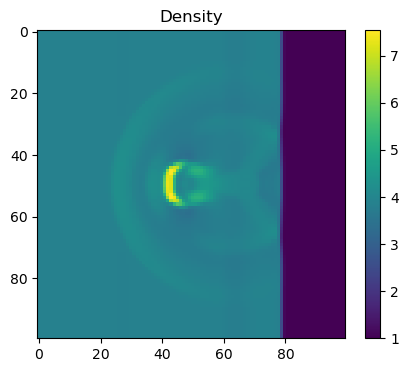

In [ ]:
# Plotting

plt.figure(figsize=(5,4))

plt.imshow(rho_2D, cmap = "viridis")

plt.colorbar()
plt.title("Density")
plt.show()

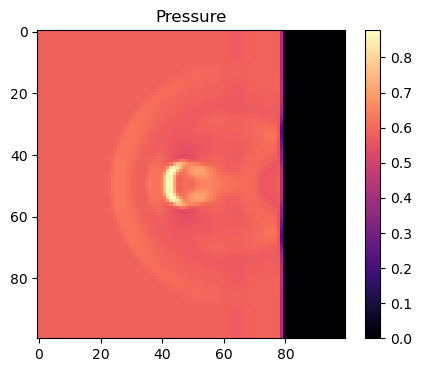

In [ ]:
# Plotting

plt.figure(figsize=(5,4))

plt.imshow(np.log10(prs_2D), cmap = "magma")

plt.colorbar()
plt.title("Pressure")
plt.show()

In [ ]:
# Obtain a 2D slice from the 3D data cube

rho_2D = rho_3D[: ,:, (mesh_sc.dimensions[0]-1)//2]
prs_2D = prs_3D[: ,:, (mesh_sc.dimensions[0]-1)//2]

print(rho_2D.shape)
print(prs_2D.shape)

(100, 100)
(100, 100)


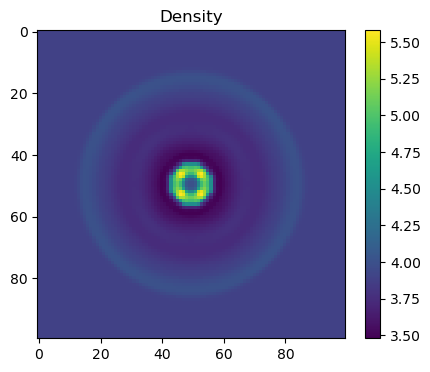

In [ ]:
# Plotting

plt.figure(figsize=(5,4))

plt.imshow(rho_2D, cmap = "viridis")

plt.colorbar()
plt.title("Density")
plt.show()

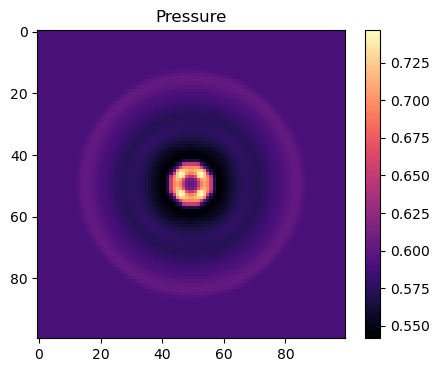

In [ ]:
# Plotting

plt.figure(figsize=(5,4))

plt.imshow(np.log10(prs_2D), cmap = "magma")

plt.colorbar()
plt.title("Pressure")
plt.show()

# 5. Flexible Image Transport System (FITS) format

This is the preferred data format used in observational astronomy.

- It is mainly used as a standard format to share astronomical images.


- But it can also contain tables or cubes, e.g. position-position-velocity diagrams.


- It has a header with metadata related to the image.


- It is much simpler than the previous formats we checked above, but very practical.


conda install astropy

pip install astropy

In [ ]:
from astropy.io import fits

In [ ]:
fits_image = fits.open("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/Data_Session3/simulation_data/vorticity.fits")

print(type(fits_image))


#print(fits_image[0].data)
vorticity = fits_image[0].data

print(vorticity.shape)

<class 'astropy.io.fits.hdu.hdulist.HDUList'>
(256, 1280, 256)


In [ ]:
print(vorticity.size)

83886080


In [ ]:
print(fits_image[0].header)

SIMPLE  =                    T / Written by IDL:  Mon Apr 19 17:56:01 2021      BITPIX  =                  -32 / Number of bits per data pixel                  NAXIS   =                    3 / Number of data axes                            NAXIS1  =                  256 /                                                NAXIS2  =                 1280 /                                                NAXIS3  =                  256 /                                                EXTEND  =                    T / FITS data may contain extensions               DATE    = '2021-04-19'         / Creation UTC (CCCC-MM-DD) date of FITS header  COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    END                                                                                                                                                                                                     

In [ ]:
print(fits_image[0].data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(vorticity.shape[2]//2)

128


In [ ]:
# Slice the image

vort_2d = vorticity[:, :, vorticity.shape[2]//2]

print(vort_2d.shape)

vort_subset = vort_2d[:,600:950]

(256, 1280)


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_75766/2395423442.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(vort_2d).T, vmin =-1., vmax=5, cmap = "magma")


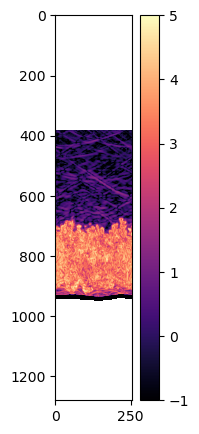

In [ ]:
# PLotting

plt.figure(figsize=(2,5))

plt.imshow(np.log10(vort_2d).T, vmin =-1., vmax=5, cmap = "magma")

plt.colorbar()

plt.show()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_75766/785731297.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(vort_subset).T, vmin =-1., vmax=5, cmap = "magma")


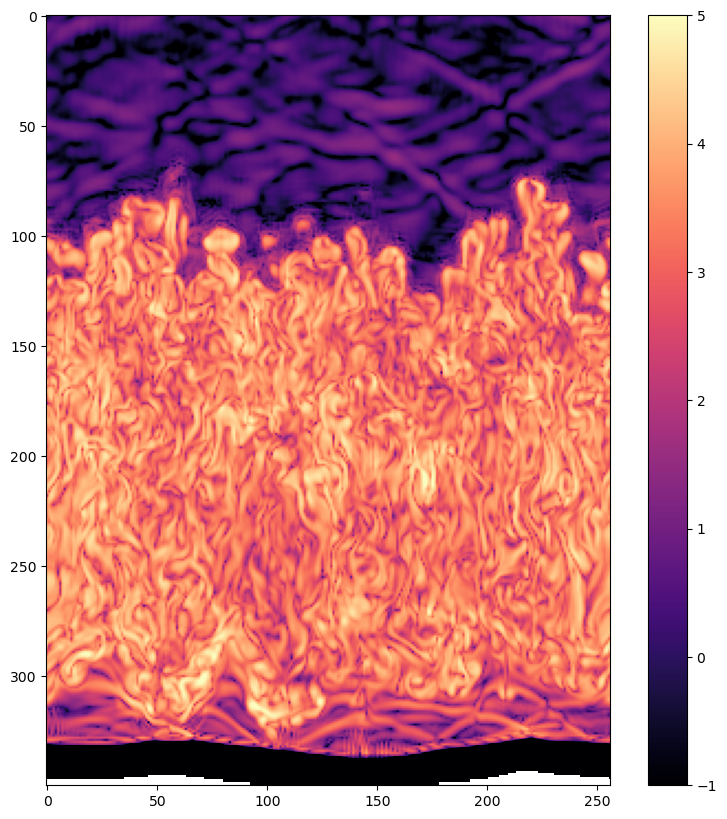

In [ ]:
# PLotting

plt.figure(figsize=(10,10))

plt.imshow(np.log10(vort_subset).T, vmin =-1., vmax=5, cmap = "magma")

plt.colorbar()

plt.show()

In [ ]:
print(vorticity.shape[1]*2//3)

853


In [ ]:
# Slice the image

vort_2d = vorticity[:, vorticity.shape[1]*2//3, :]

print(vort_2d.shape)
#vort_subset = vort_2d[:,600:950]


(256, 256)


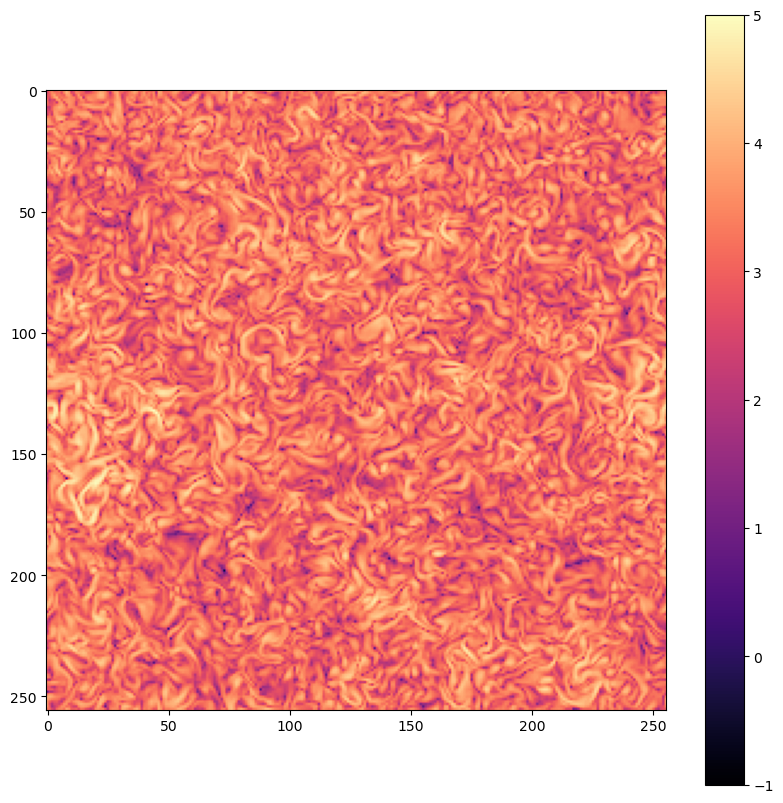

In [ ]:
# PLotting

plt.figure(figsize=(10,10))

plt.imshow(np.log10(vort_2d).T, vmin =-1., vmax=5, cmap = "magma")

plt.colorbar()

plt.show()